# Import Libraries

In [2]:
import os

import pandas as pd
import numpy as np

from nltk.corpus import stopwords
from nltk import word_tokenize

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

from wordcloud import WordCloud
import matplotlib.pyplot as plt

from translate import Translator

# functions which is special for this notebook
from string_operation import StringOperation

If the text is in **Indonesian**, a library called **Sastrawi** can be used.

# Functions

In [3]:
# see wordcloud
def generate_wordcloud(sentence_list, width=5, height=3):
    long_string = ','.join(sentence_list)# Create a WordCloud object
    wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue'
                         )# Generate a word cloud
    wordcloud.generate(long_string)
    
    plt.figure(figsize=(width, height))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

# Read Dataset

In [4]:
input_path = os.path.join('dataset', 'scrapping_result.csv')
df_scrapping = pd.read_csv(input_path)
print(df_scrapping.shape)

display(df_scrapping)

(750, 4)


,article_link,article_title,article_date,article_content
0,https://edukasi.kompas.com/read/2022/12/03/160...,6 Alasan Pentingnya Belajar Coding Dimulai dar...,2022-12-03 16:07:00,\nKOMPAS.com - Apabila kamu termasuk siswa yan...
1,https://www.kompas.com/edu/read/2022/12/03/145...,Lowongan Kerja Kalbe Farma bagi Lulusan Minima...,2022-12-03 14:59:00,\nKOMPAS.com - PT Kalbe Farma Tbk membuka lowo...
2,https://www.kompas.com/edu/read/2022/12/03/142...,"BUMN Semen Indonesia Buka 8 Lowongan Kerja, Lu...",2022-12-03 14:27:00,\nKOMPAS.com - Badan Usaha Milik Negara (BUMN)...
3,https://edukasi.kompas.com/read/2022/12/03/141...,Buah dan Sayur untuk Kesehatan Mata,2022-12-03 14:17:00,\nKOMPAS.com - Buah dan sayur mengandung banya...
4,https://www.kompas.com/edu/read/2022/12/03/134...,Contoh Soal Literasi Bahasa Indonesia SNBT 202...,2022-12-03 13:47:00,\nKOMPAS.com - Jadwal pelaksanaan Ujian Tulis ...
...,...,...,...,...
745,https://www.kompas.com/edu/read/2022/11/08/211...,Ditjen Kebudayaan Kenalkan Kearifan Lokal kepa...,2022-11-08 21:10:30,\nKOMPAS.com - Di tengah perhelatan G20 di Bal...
746,https://www.kompas.com/edu/read/2022/11/08/203...,BPIP dan UNJ Gelar Bedah Musik Kebangsaan untu...,2022-11-08 20:36:41,\nKOMPAS.com -&amp;nbsp;Badan Pembinaan Ideolo...
747,https://edukasi.kompas.com/read/2022/11/08/192...,3 Sekolah Terbaik di Jawa Timur Beserta Profil...,2022-11-08 19:28:32,\nKOMPAS.com &amp;ndash; Lembaga Tes Masuk Per...
748,https://edukasi.kompas.com/read/2022/11/08/191...,10 Cara Mengatasi Stres pada Mahasiswa,2022-11-08 19:17:00,\nKOMPAS.com - Saat menjadi mahasiswa tentunya...


# Simple Profiling

there will be no visualization

In [5]:
# check profile and missing value
print(df_scrapping.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   article_link     750 non-null    object
 1   article_title    750 non-null    object
 2   article_date     750 non-null    object
 3   article_content  750 non-null    object
dtypes: object(4)
memory usage: 23.6+ KB
None


there is no missing value

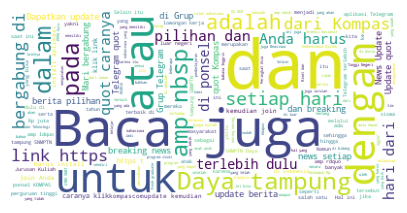

In [6]:
# see word cloud before cleansing
generate_wordcloud(list(df_scrapping['article_content'].values))

The data contains more than one (Indonesia and English), so the Indonesian will be translated first into English in the next step

# Preprocess

Column **english title** will be used in the next processing

In [9]:
# remove linux from sentence because it is the main topic from search result
stopword_list = stopwords.words('indonesian')

In [12]:
df_preprocess = df_scrapping.copy()

# remove nonalphabetic data
df_preprocess['clean_text'] = StringOperation.remove_nonalphabet(df_preprocess['article_content'])
# remove stopwords
df_preprocess['clean_text'] = StringOperation.remove_stopwords(df_preprocess['clean_text'], stopword_list)
# word stemming
df_preprocess['clean_text'] = StringOperation.word_stemming(df_preprocess['clean_text'])

display(df_preprocess)

,article_link,article_title,article_date,article_content,clean_text
0,https://edukasi.kompas.com/read/2022/12/03/160...,6 Alasan Pentingnya Belajar Coding Dimulai dar...,2022-12-03 16:07:00,\nKOMPAS.com - Apabila kamu termasuk siswa yan...,kompascom siswa tertarik programm belajar pemr...
1,https://www.kompas.com/edu/read/2022/12/03/145...,Lowongan Kerja Kalbe Farma bagi Lulusan Minima...,2022-12-03 14:59:00,\nKOMPAS.com - PT Kalbe Farma Tbk membuka lowo...,kompascom pt kalb farma tbk membuka lowongan k...
2,https://www.kompas.com/edu/read/2022/12/03/142...,"BUMN Semen Indonesia Buka 8 Lowongan Kerja, Lu...",2022-12-03 14:27:00,\nKOMPAS.com - Badan Usaha Milik Negara (BUMN)...,kompascom badan usaha milik negara bumn semen ...
3,https://edukasi.kompas.com/read/2022/12/03/141...,Buah dan Sayur untuk Kesehatan Mata,2022-12-03 14:17:00,\nKOMPAS.com - Buah dan sayur mengandung banya...,kompascom buah sayur mengandung manfaat keseha...
4,https://www.kompas.com/edu/read/2022/12/03/134...,Contoh Soal Literasi Bahasa Indonesia SNBT 202...,2022-12-03 13:47:00,\nKOMPAS.com - Jadwal pelaksanaan Ujian Tulis ...,kompascom jadwal pelaksanaan ujian tuli berbas...
...,...,...,...,...,...
745,https://www.kompas.com/edu/read/2022/11/08/211...,Ditjen Kebudayaan Kenalkan Kearifan Lokal kepa...,2022-11-08 21:10:30,\nKOMPAS.com - Di tengah perhelatan G20 di Bal...,kompascom perhelatan g bali direktorat jender ...
746,https://www.kompas.com/edu/read/2022/11/08/203...,BPIP dan UNJ Gelar Bedah Musik Kebangsaan untu...,2022-11-08 20:36:41,\nKOMPAS.com -&amp;nbsp;Badan Pembinaan Ideolo...,kompascom ampnbspbadan pembinaan ideolog panca...
747,https://edukasi.kompas.com/read/2022/11/08/192...,3 Sekolah Terbaik di Jawa Timur Beserta Profil...,2022-11-08 19:28:32,\nKOMPAS.com &amp;ndash; Lembaga Tes Masuk Per...,kompascom ampndash lembaga te masuk perguruan ...
748,https://edukasi.kompas.com/read/2022/11/08/191...,10 Cara Mengatasi Stres pada Mahasiswa,2022-11-08 19:17:00,\nKOMPAS.com - Saat menjadi mahasiswa tentunya...,kompascom mahasiswa beban tanggung siswa sekol...


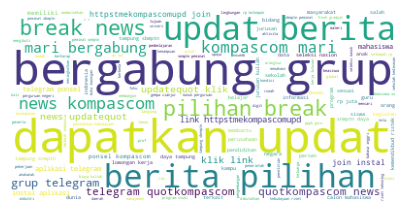

In [14]:
generate_wordcloud(list(df_preprocess['clean_text'].values))

now there is only one language in the dataset shown from the picture above

# Clustering Section

clustering process be evaluated using **silhouette score**

In [ ]:
# create model for text data
vectorizer = TfidfVectorizer(
    tokenizer = word_tokenize,
    max_df = 0.8,
    min_df = 3,
    max_features=100,
    ngram_range=(1,3)
)
tfidf_model = vectorizer.fit_transform(df_preprocess['clean_text'])

In [ ]:
# define range cluster to ve evaluated
max_cluster = 21
cluster_range = range(2,max_cluster)

result_score = {}

for cluster_ in cluster_range:
    km_model = KMeans(n_clusters=cluster_, random_state=42, n_init=1)
    km_model.fit_predict(tfidf_model)
    
    score = silhouette_score(tfidf_model, km_model.labels_, metric='euclidean')
    # Print the score
    print(f'Silhouetter Score for {cluster_}: %.3f' % score)
    
    # save result
    result_score[cluster_] = score

In [ ]:
max(list(result_score.values()))

In [ ]:
feature_names = vectorizer.get_feature_names()

dense = tfidf_model.todense()
denselist = dense.tolist()

all_keywords = []

for description in denselist:
    x=0
    keywords = []
    for word in description:
        if word > 0:
            keywords.append(feature_names[x])
        x=x+1
    all_keywords.append(keywords)


In [ ]:
print (df_preprocess['clean_title'][0])
print (all_keywords[0])